<a href="https://colab.research.google.com/github/rdrudi/PythonDataAnalysis/blob/master/employeesTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employees Turnover 
## Decision Tree Classifier
Utiliza o DecisionTreeClassifier do SciKit-Learn para construir uma árvore de decisão para prever se um funcionário irá pedir demissão ou não.  

In [5]:
# imports
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd

In [6]:
# configurações
plt.style.use("classic")
plt.rcParams['figure.figsize'] = (10,4) 

In [8]:
#importando o dataset
dados = pd.read_csv('https://raw.githubusercontent.com/rdrudi/PythonDataAnalysis/master/employeesTurnoverRandomForest/EmployeesTurnoverDataset.csv')
dados.head()

,satisfacao,avaliacao,projetos,horas,tempo,acidente,saida,promocao,depto,nivel
0,0.38,0.53,2,157,3,0,1,0,vendas,baixo
1,0.80,0.86,5,262,6,0,1,0,vendas,medio
2,0.11,0.88,7,272,4,0,1,0,vendas,medio
3,0.72,0.87,5,223,5,0,1,0,vendas,baixo
4,0.37,0.52,2,159,3,0,1,0,vendas,baixo


In [9]:
# checando os últimos registros
dados.tail()

,satisfacao,avaliacao,projetos,horas,tempo,acidente,saida,promocao,depto,nivel
14994,0.40,0.57,2,151,3,0,1,0,suporte,baixo
14995,0.37,0.48,2,160,3,0,1,0,suporte,baixo
14996,0.37,0.53,2,143,3,0,1,0,suporte,baixo
14997,0.11,0.96,6,280,4,0,1,0,suporte,baixo
14998,0.37,0.52,2,158,3,0,1,0,suporte,baixo


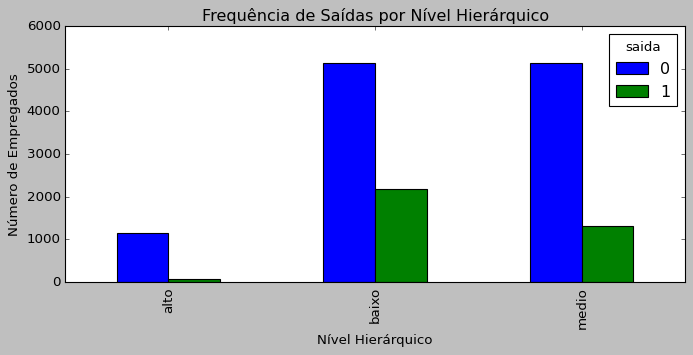

In [10]:
# analisando o dataset
pd.crosstab(dados.nivel,dados.saida).plot(kind='bar')
plt.title('Frequência de Saídas por Nível Hierárquico')
plt.xlabel('Nível Hierárquico')
plt.ylabel('Número de Empregados')
plt.show()

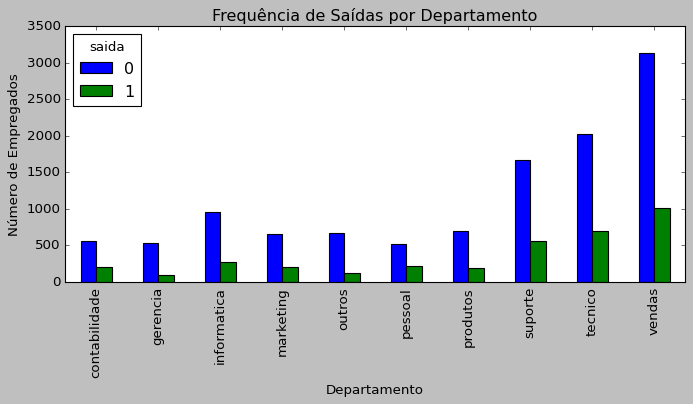

In [11]:
pd.crosstab(dados.depto,dados.saida).plot(kind='bar')
plt.title('Frequência de Saídas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Empregados')
plt.show()

In [12]:
# transformando categorias em campos numéricos para agiliar o processamento
pd.get_dummies(dados.nivel)
pd.get_dummies(dados.depto)
pd.get_dummies(dados)
df = pd.get_dummies(dados)
df.head()

,satisfacao,avaliacao,projetos,horas,tempo,acidente,saida,promocao,depto_contabilidade,depto_gerencia,depto_informatica,depto_marketing,depto_outros,depto_pessoal,depto_produtos,depto_suporte,depto_tecnico,depto_vendas,nivel_alto,nivel_baixo,nivel_medio
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [13]:
# verificando o balanceamento da variável saída
ficaram = df.loc[df.saida==False,'saida'].count()
sairam = df.loc[df.saida==True,'saida'].count()
print('Total de funcionários que ainda estão na empresa: ', ficaram)
print('Total de funcionários que já saíram:  ', sairam)
print('Proporção saíram / ficaram: %.2f%% ' %((sairam/ficaram)*100))

Total de funcionários que ainda estão na empresa:  11428
Total de funcionários que já saíram:   3571
Proporção saíram / ficaram: 31.25% 


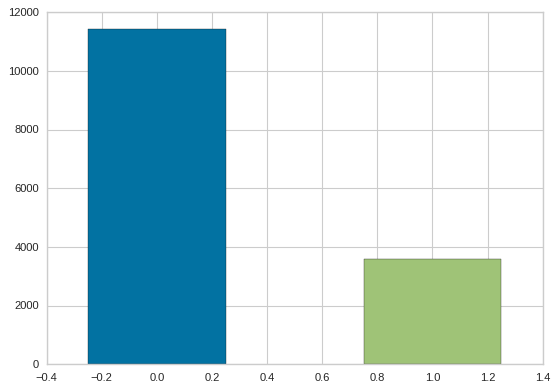

In [15]:
# verificando a distribuição da variável resposta
from yellowbrick.target import ClassBalance
vis = ClassBalance(labels=['atual','ex']).fit(df.saida)

In [17]:
# criandos os datasets de treinamento e teste 
from sklearn.model_selection import train_test_split
x = df.loc[:,df.columns != 'saida']
y = df.saida
xTrain,xTest,yTrain,yTest = train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [18]:
# Criando a interface com usuário para escolha dos parâmetros 
# O sistema construirá uma árvore de decisão, com auxílio de uma random forest para minimização de variáveis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [19]:
# a tag interact informa ao coab que os parâmeros de entrada da função
# devem ser utilizados para compor a interface com o usuário
@interact
def estimador(crit=['gini','entropy'],
           split=['best','random'],
           depth=IntSlider(min=1,max=10,value=3,continuous_update=False),
           min_split=IntSlider(min=2,max=5,value=2,continuous_update=False),
           min_leaf=IntSlider(min=1,max=5,value=1,continuous_update=False)):
    dtc = DecisionTreeClassifier(random_state=0,
                                 criterion=crit,
                                 splitter=split,
                                 max_depth=depth,
                                 min_samples_split=min_split,
                                 min_samples_leaf=min_leaf)
    dtc.fit(xTrain,yTrain)
    print('Acurácia Treino: %.2f' %((accuracy_score(yTrain,dtc.predict(xTrain)))))
    print('Acurácia Teste: %.2f' %((accuracy_score(yTest,dtc.predict(xTest)))))
    
    arvore = Source(tree.export_graphviz(dtc,out_file=None,
                                         feature_names=xTrain.columns,
                                         class_names=['Atual','Ex'],
                                         filled=True))
    display(Image(data=arvore.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…